In [1]:
#Main File
from utilities import *

df_dmep = load_especie("DOLAR MEP")
df_djones = load_especie("DIA_US")
df_merval = load_especie('MERVAL')
df_doficial = load_especie('DOLAR OFICIAL')

file = 'data/series_historicas_acciones.csv'
df = read_data(file)
#df = read_data_xls('data/series_historicas.xlsx')
df = convertir(df)
df = df.sort_values(by=['FECHA'])


Archivo descargado exitosamente.
Archivo descargado exitosamente.
Archivo descargado exitosamente.
Archivo descargado exitosamente.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
dias = 55

Dolar Oficial: Verde
Dolar MEP: Azul
Merval: Rojo
Down Jones: Amarillo


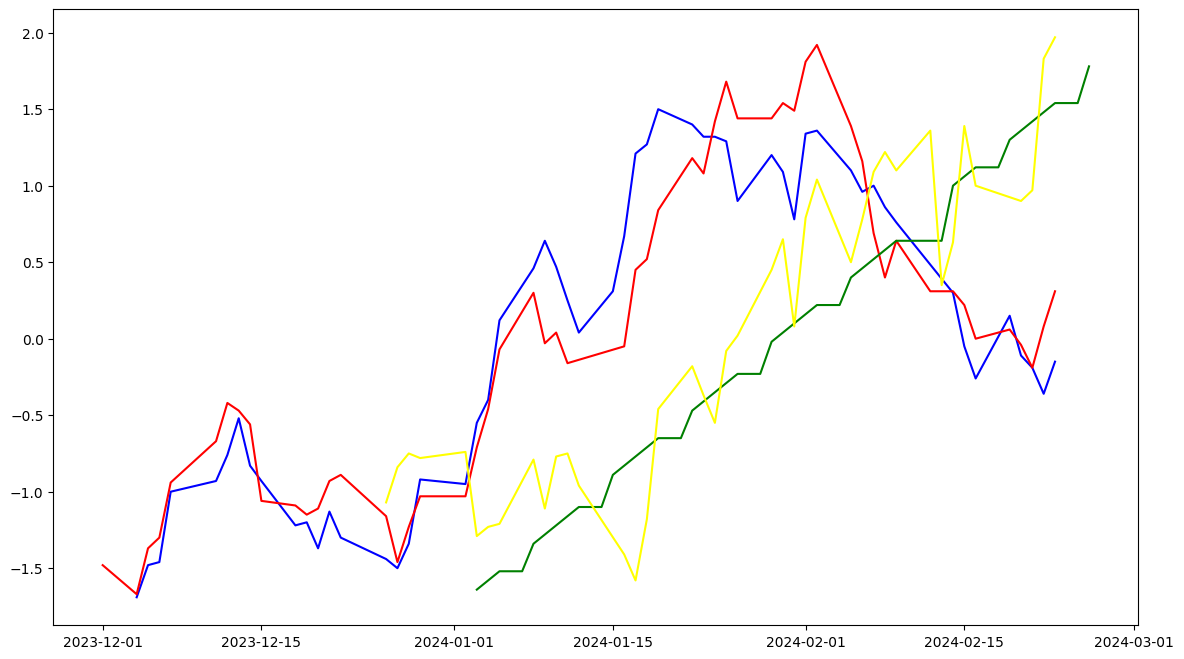

In [3]:
df_dmep = df_dmep.tail(dias)
df_dmep = normalizar(df_dmep)
df_djones = df_djones.tail(dias-(int(dias/7)*2))
df_djones = normalizar(df_djones)
df_merval = df_merval.tail(dias)
df_merval = normalizar(df_merval)
df_doficial = df_doficial.tail(dias)
df_doficial = normalizar(df_doficial)
plt.figure(figsize=(14, 8))
plt.plot(df_dmep['FECHA'], df_dmep['CIERRE_N'], color='blue')
plt.plot(df_merval['FECHA'], df_merval['CIERRE_N'], color='red')
plt.plot(df_doficial['FECHA'], df_doficial['CIERRE_N'], color='green')
plt.plot(df_djones['FECHA'], df_djones['CIERRE_N'], color='yellow')

print('Dolar Oficial: Verde')
print('Dolar MEP: Azul')
print('Merval: Rojo')
print('Down Jones: Amarillo')

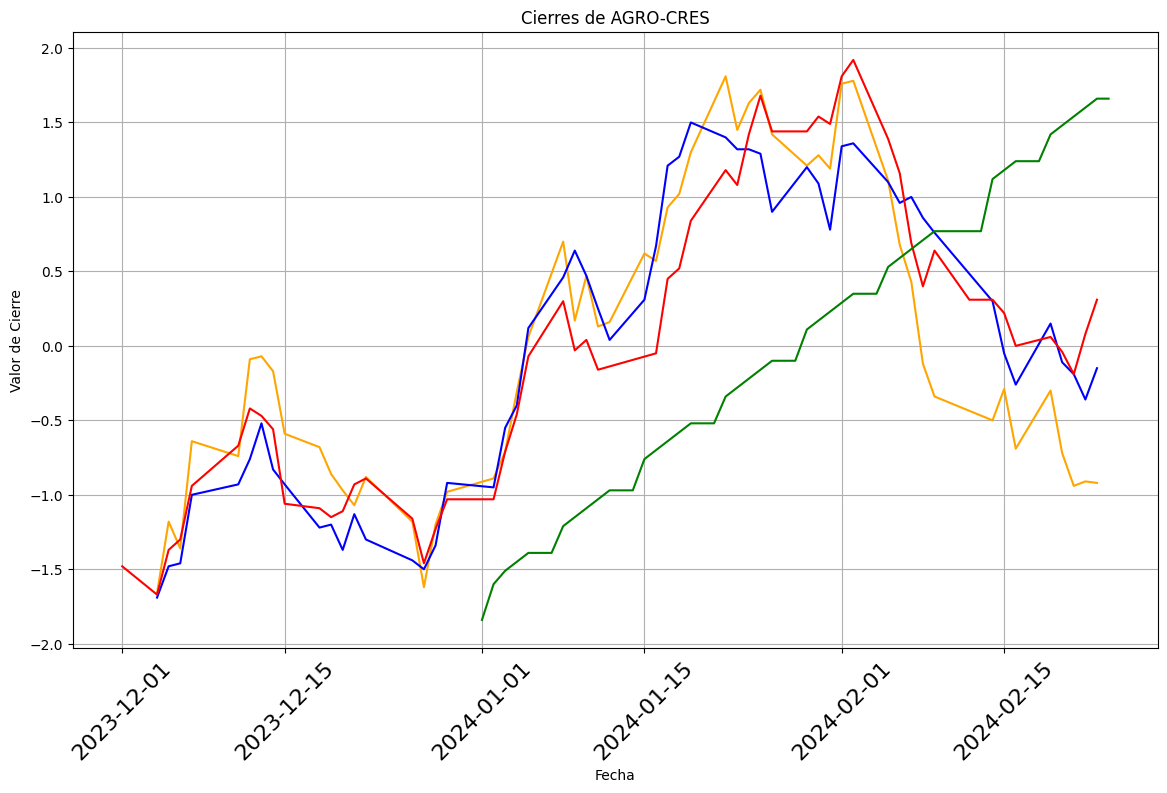

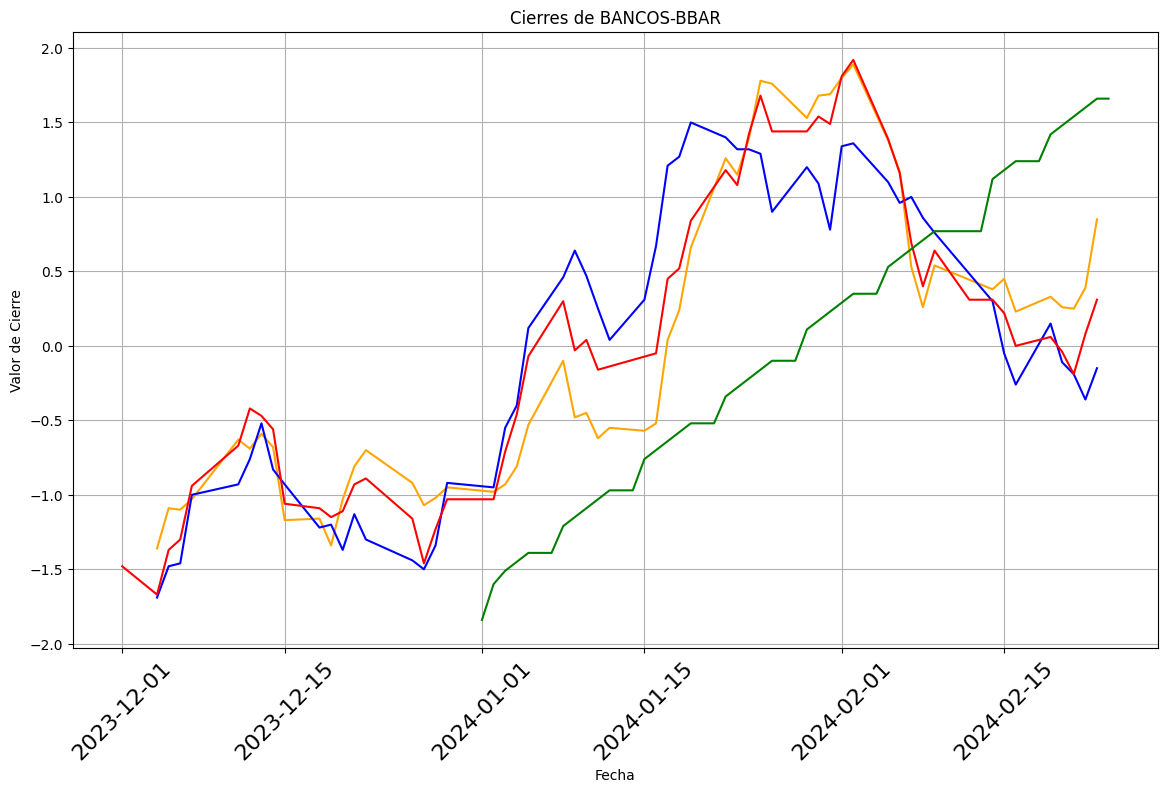

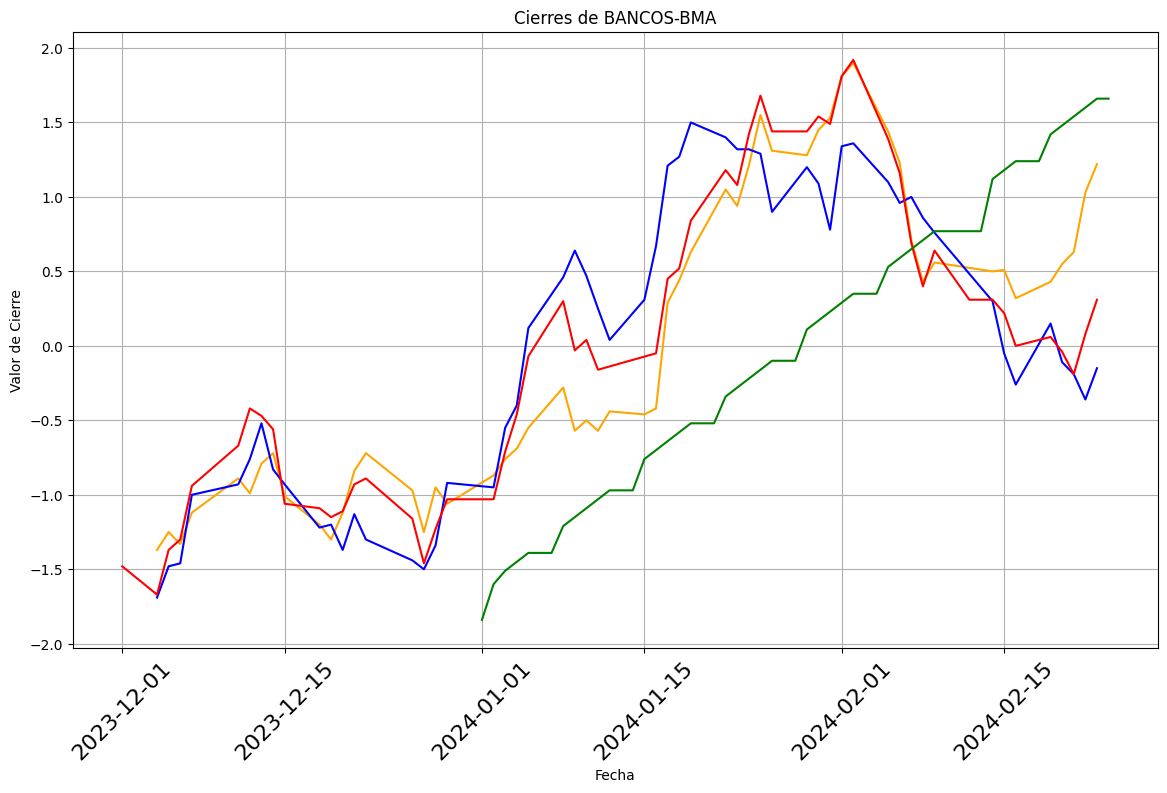

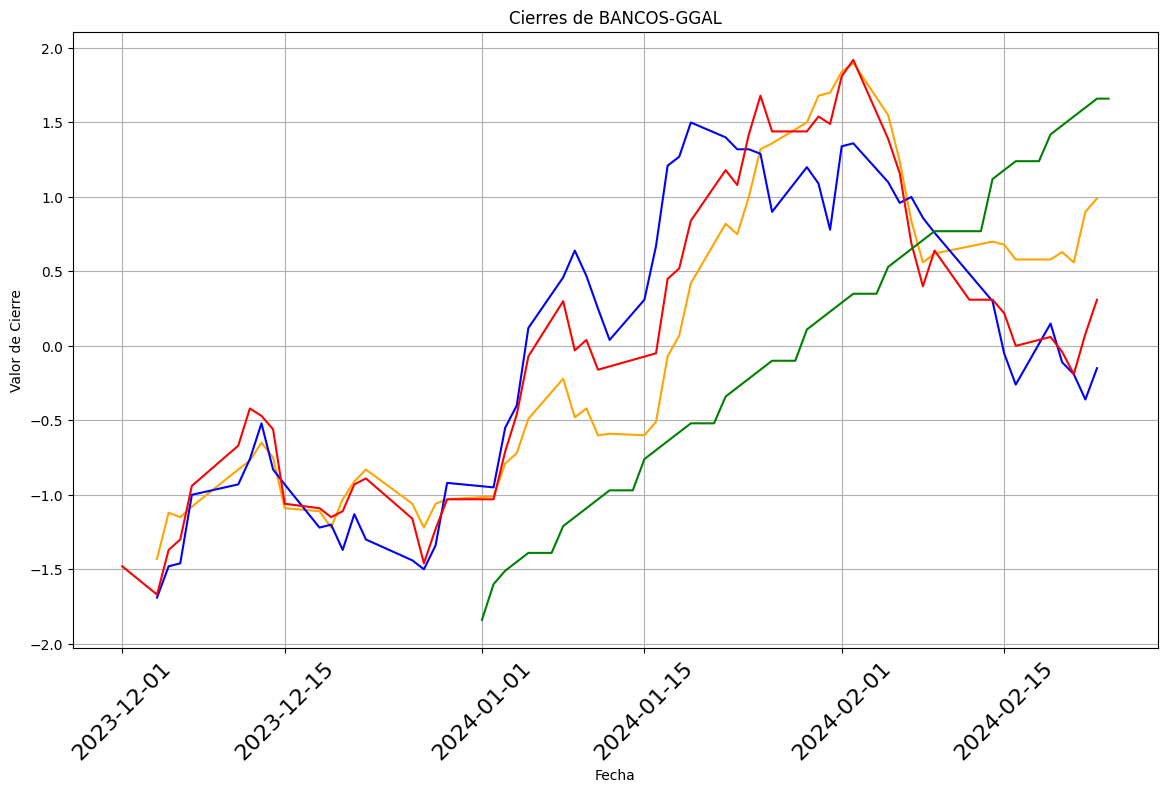

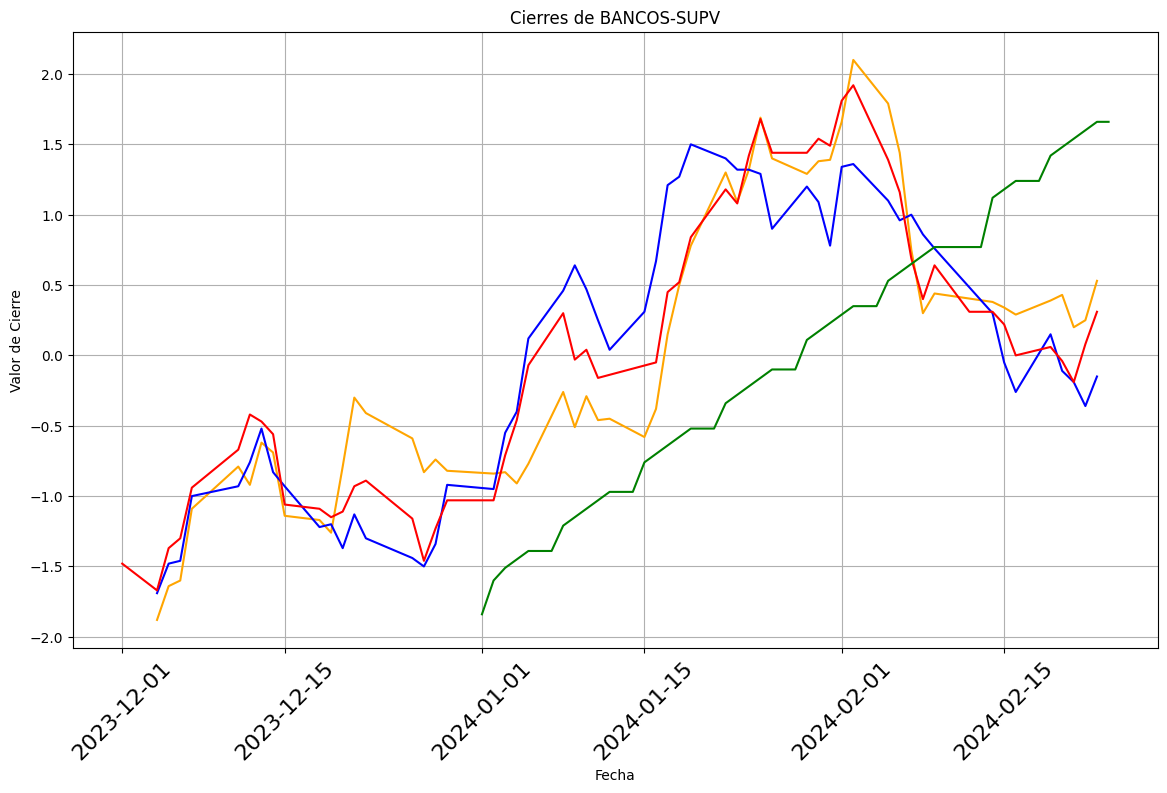

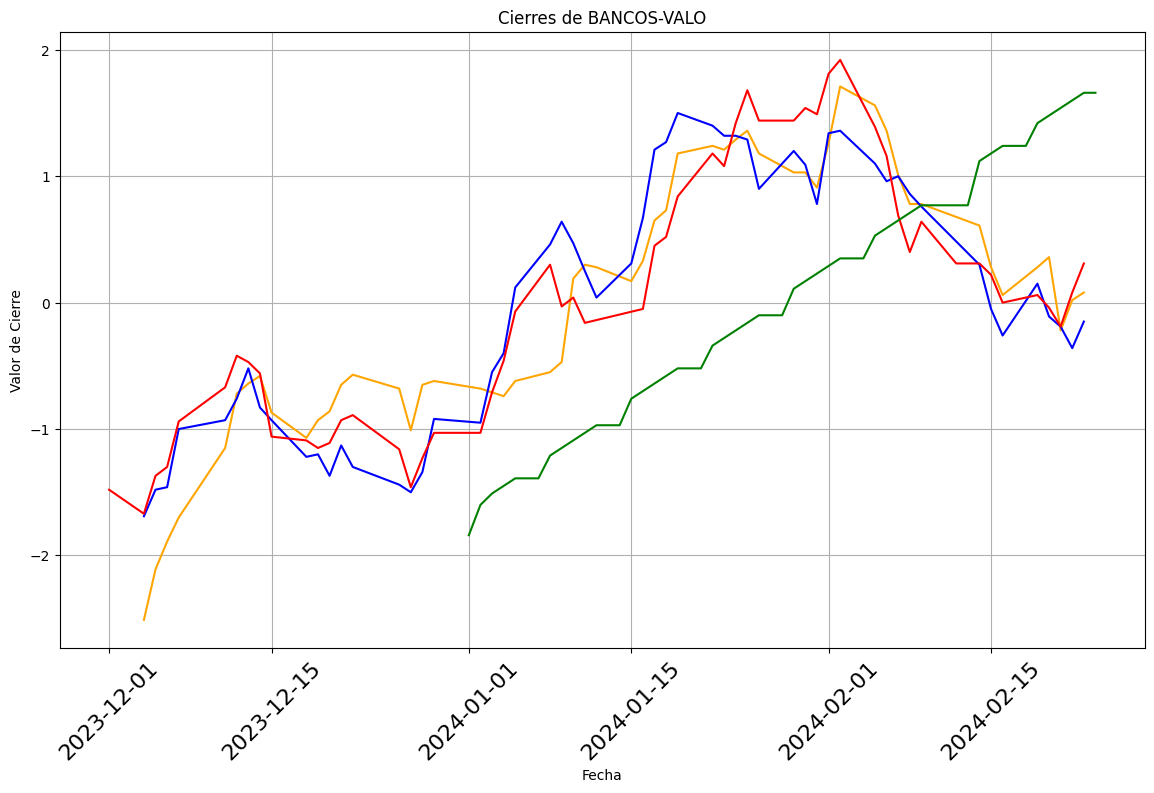

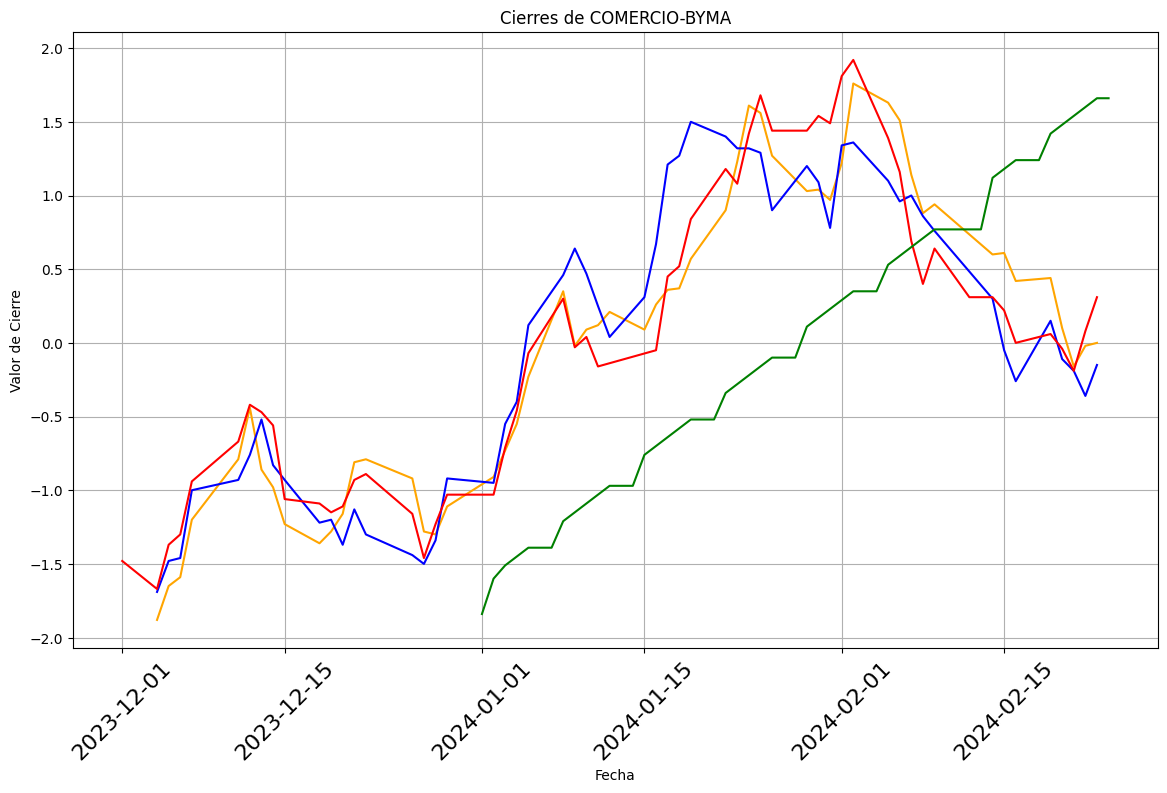

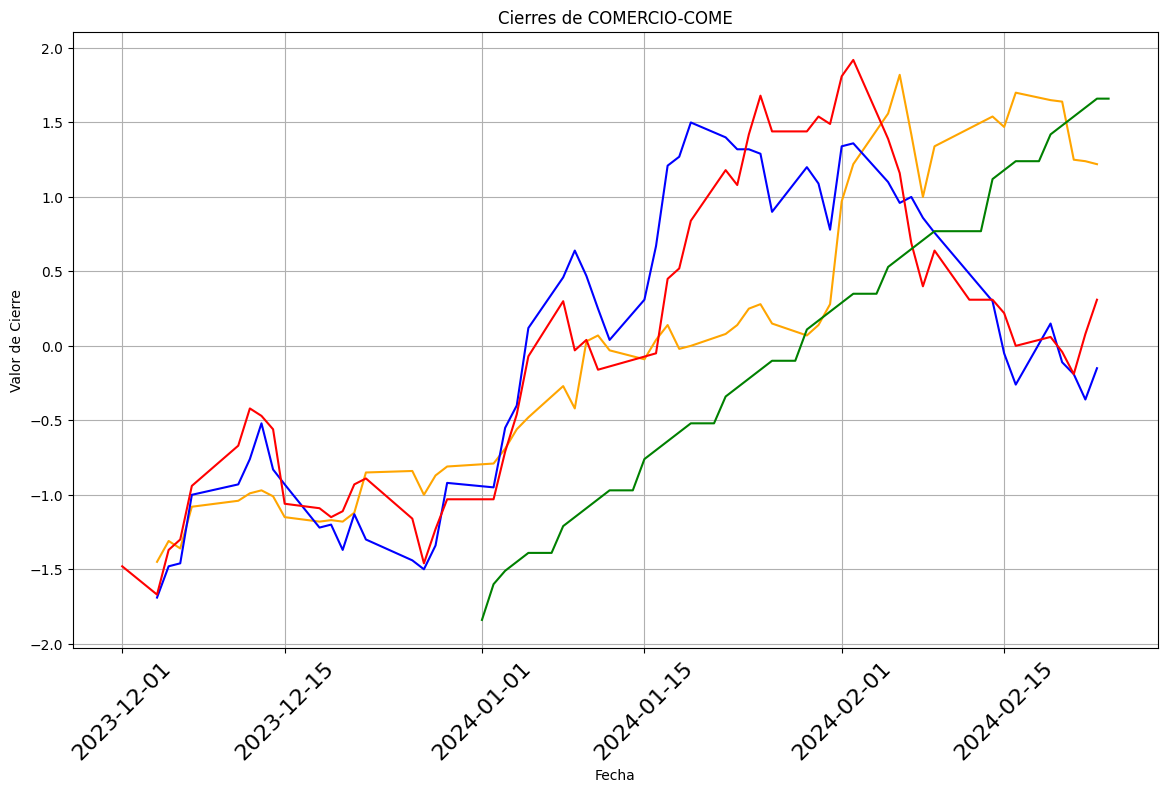

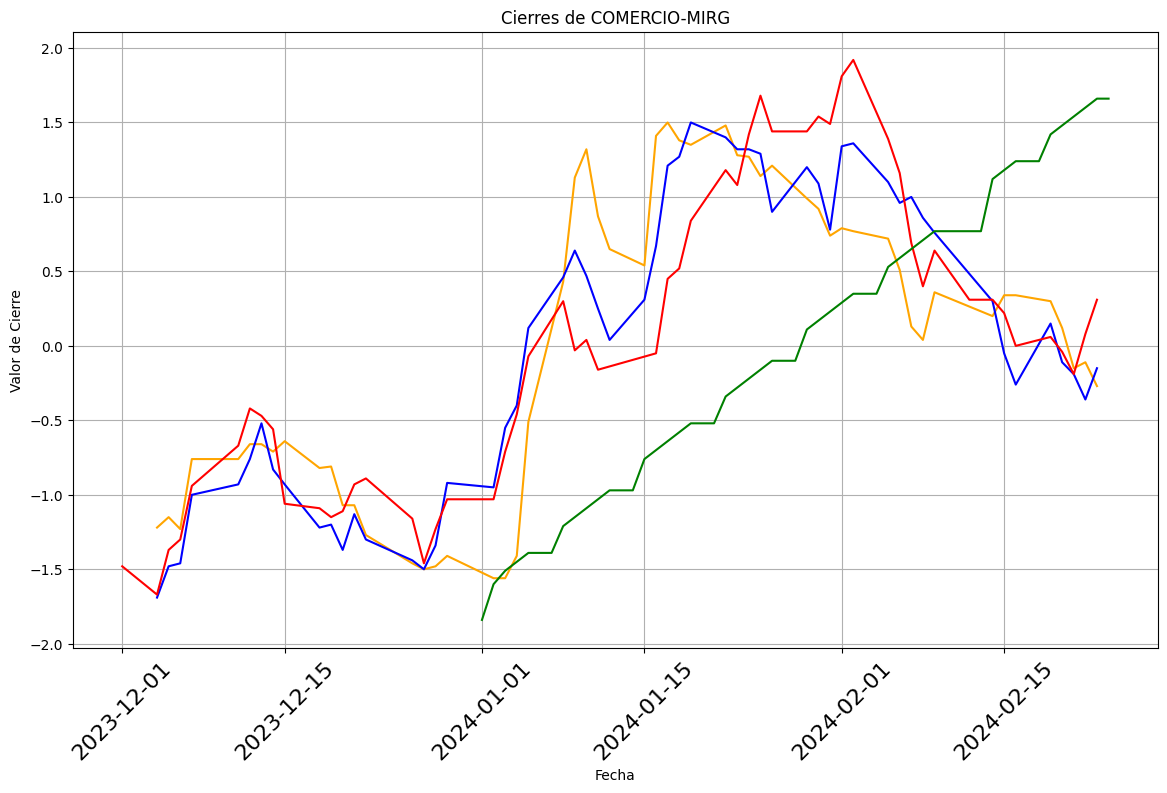

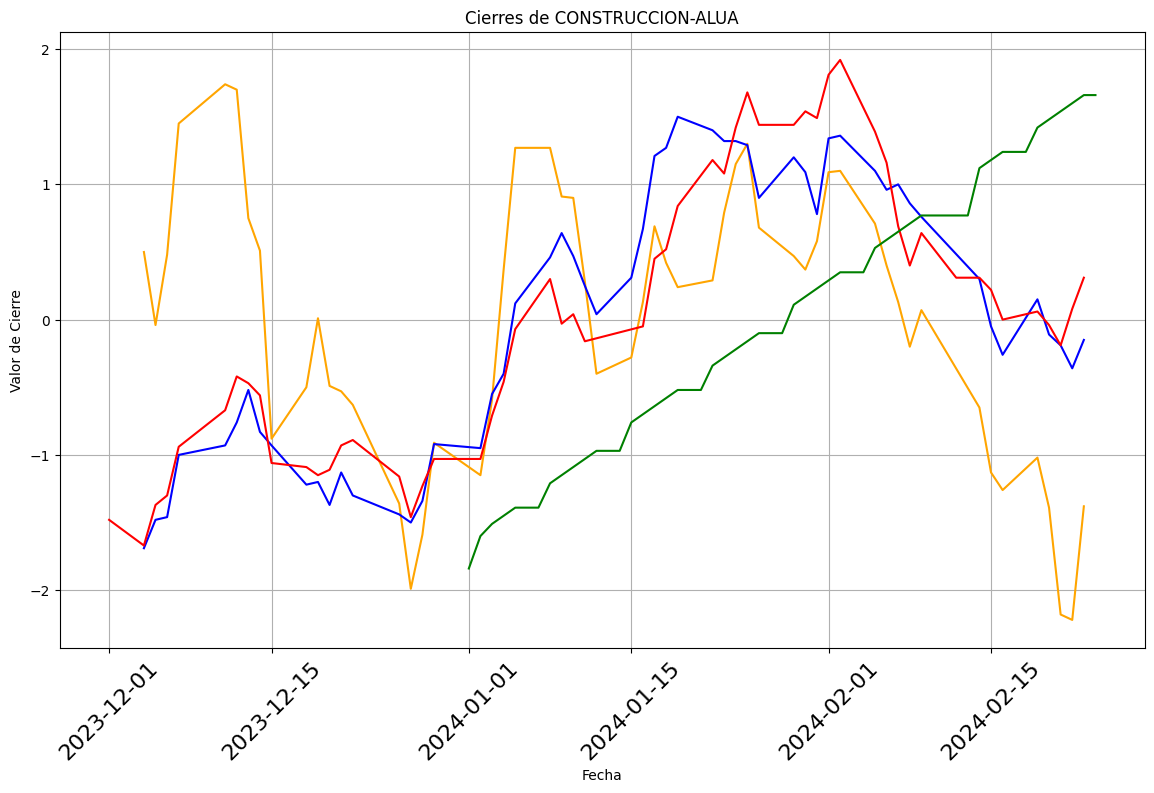

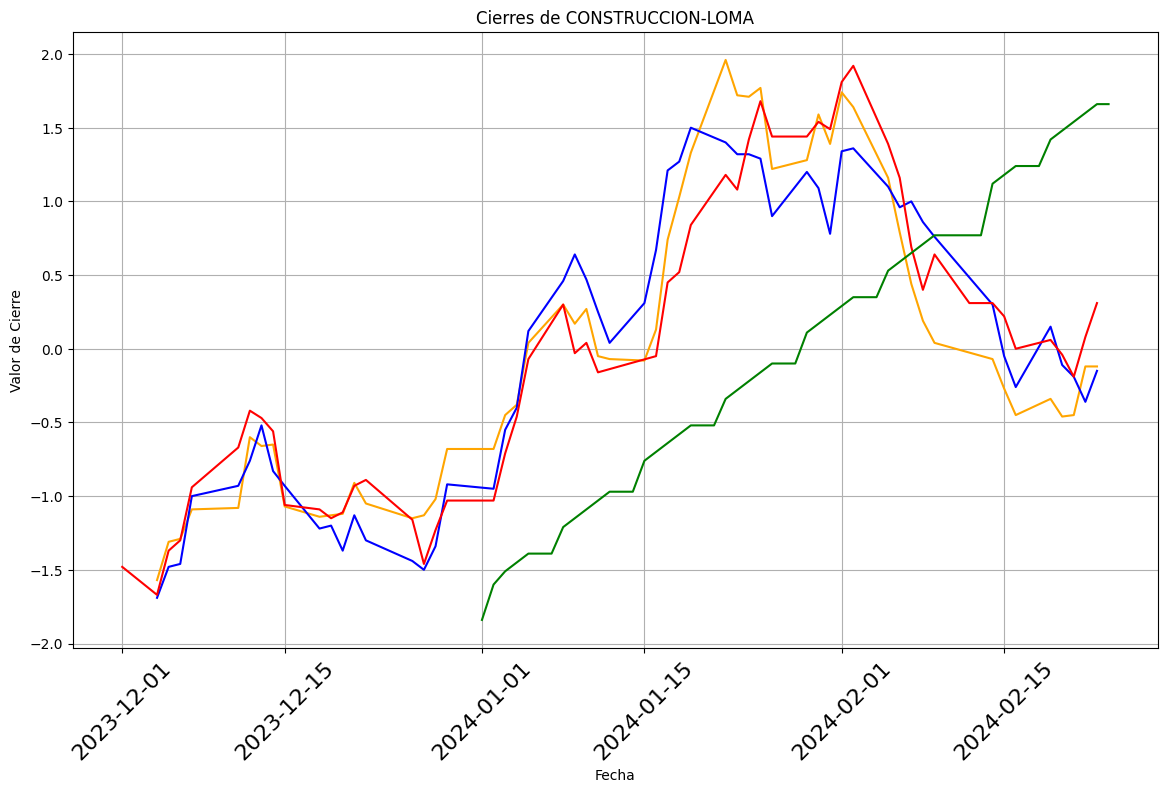

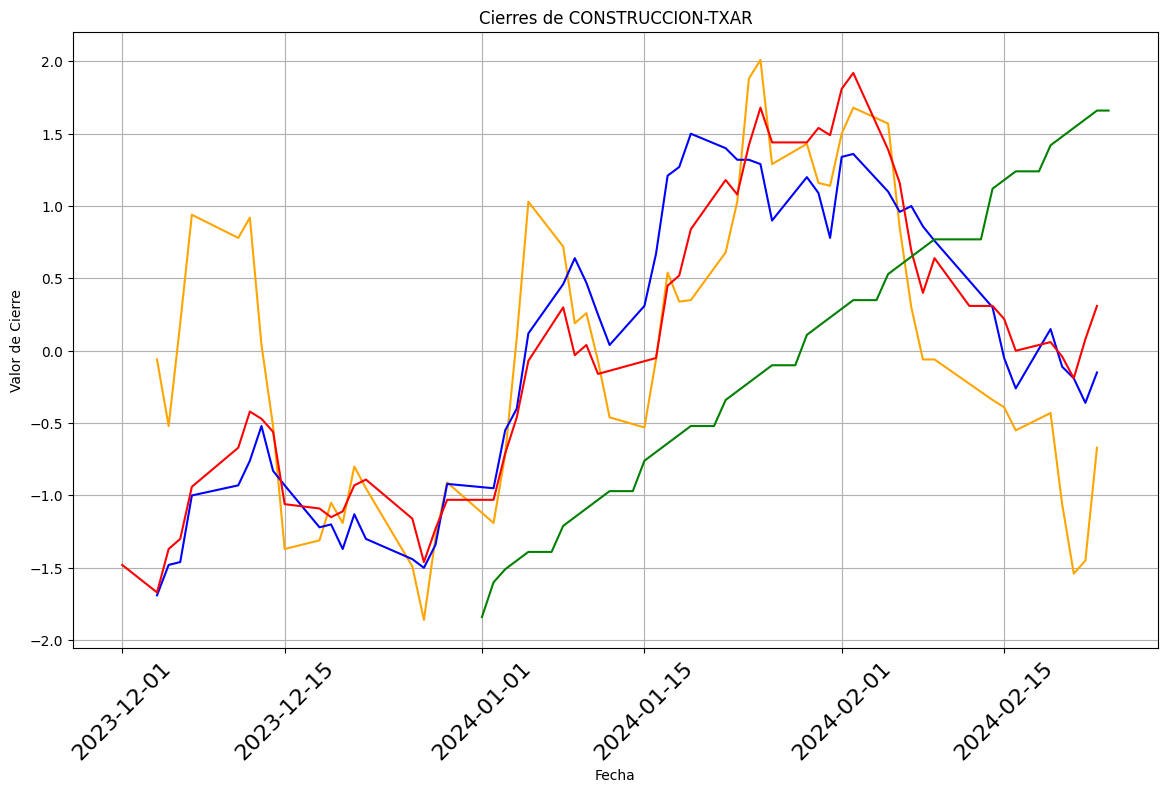

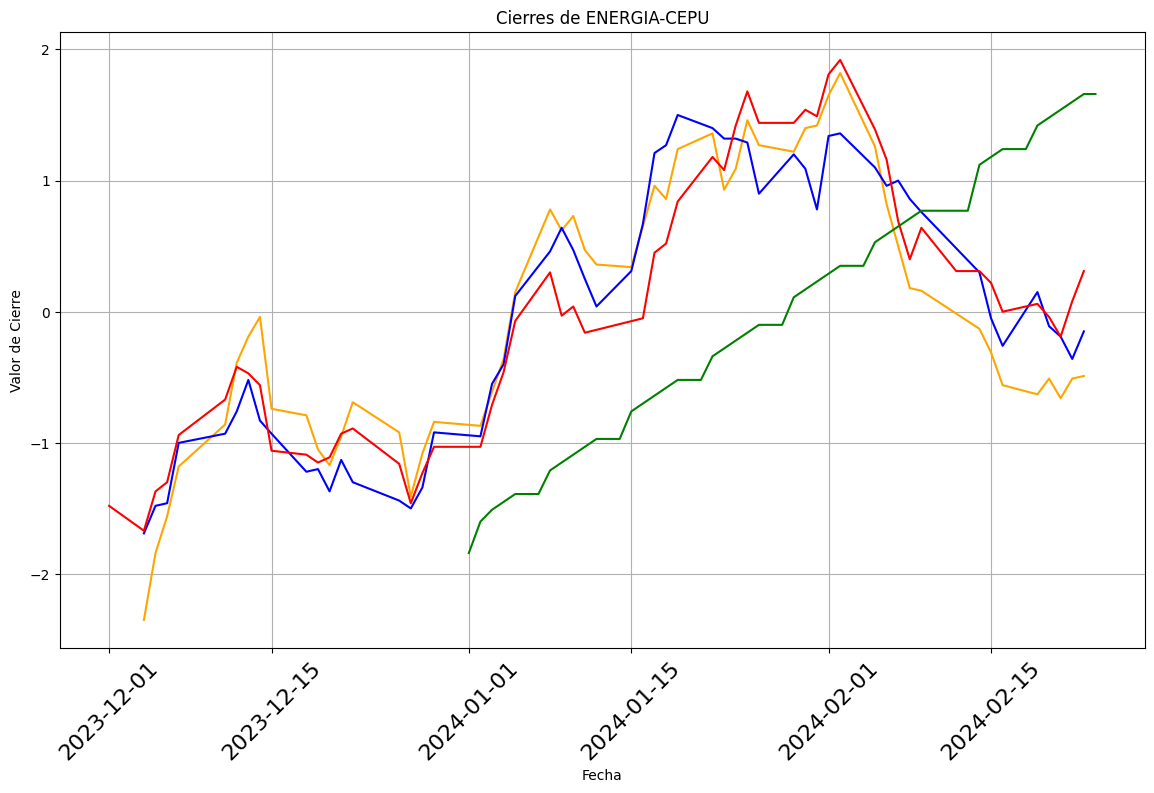

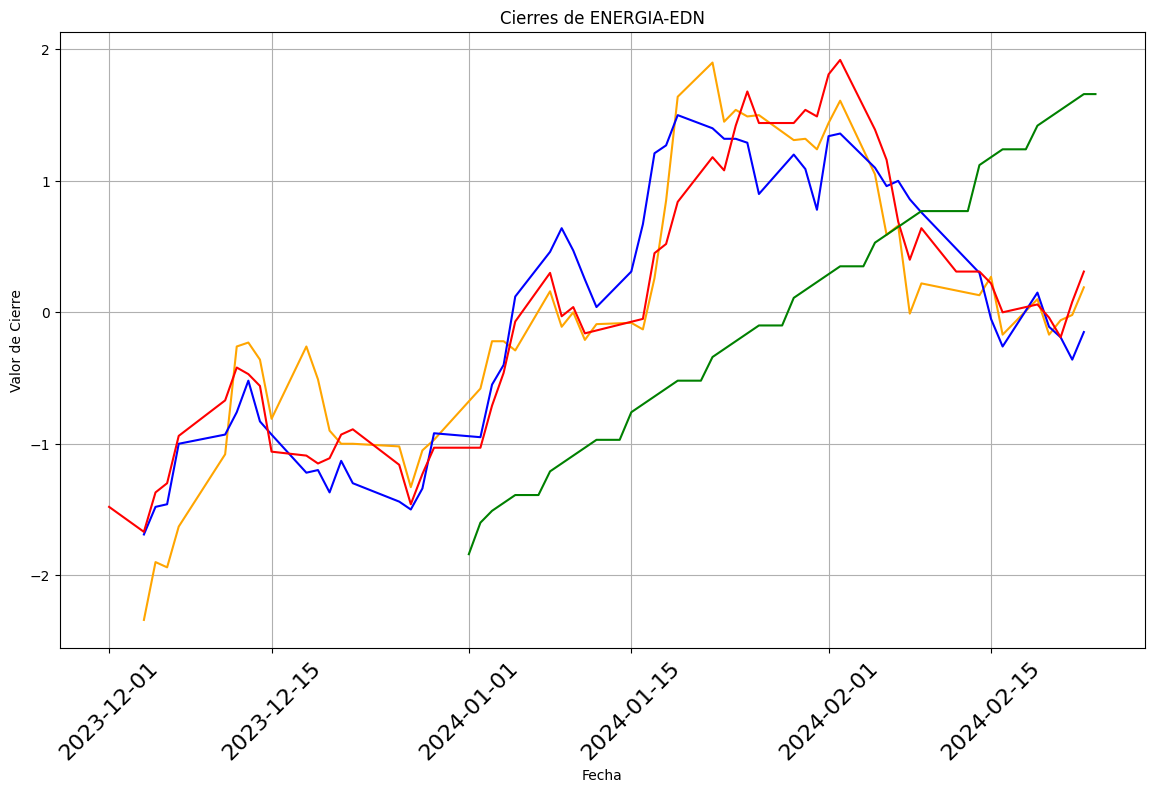

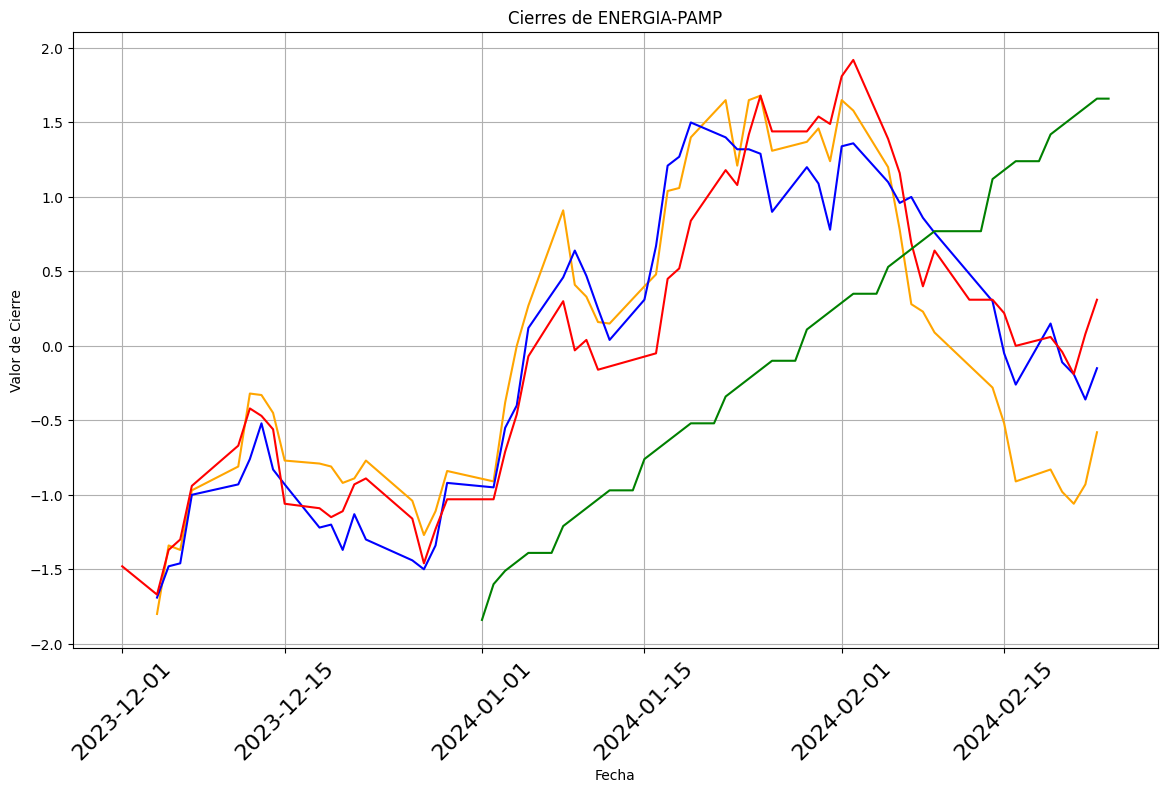

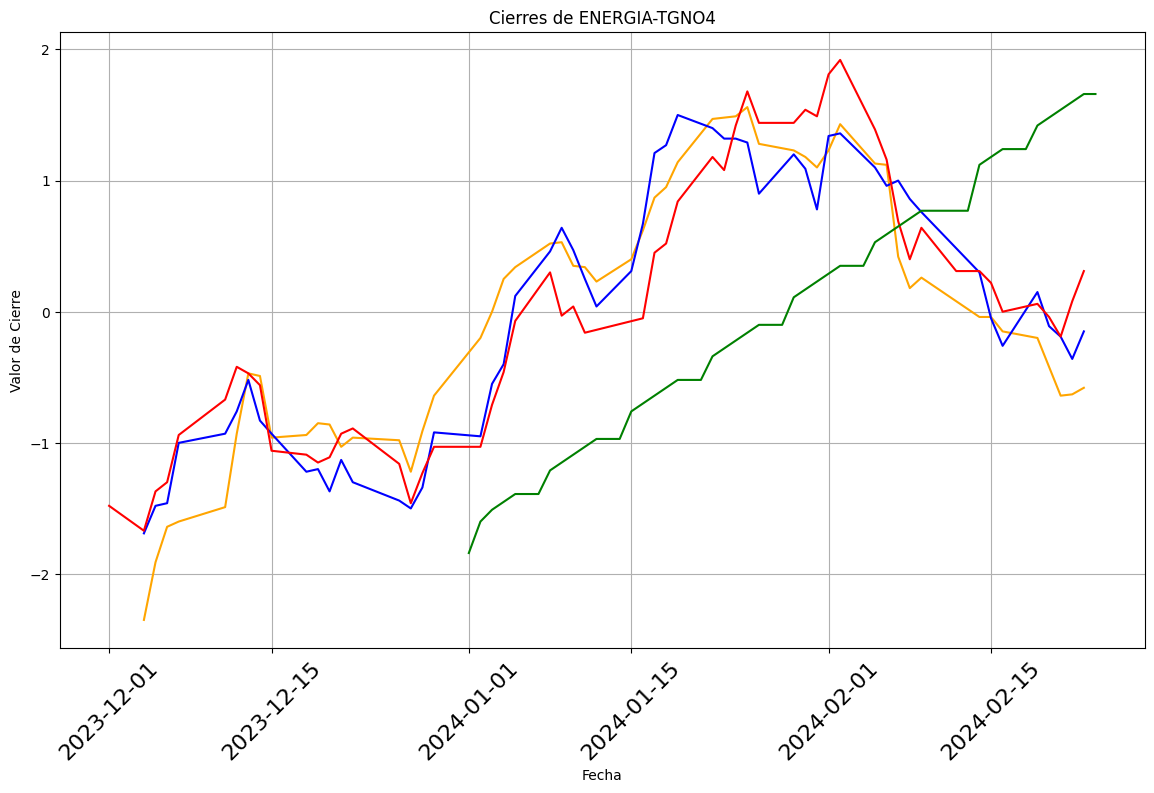

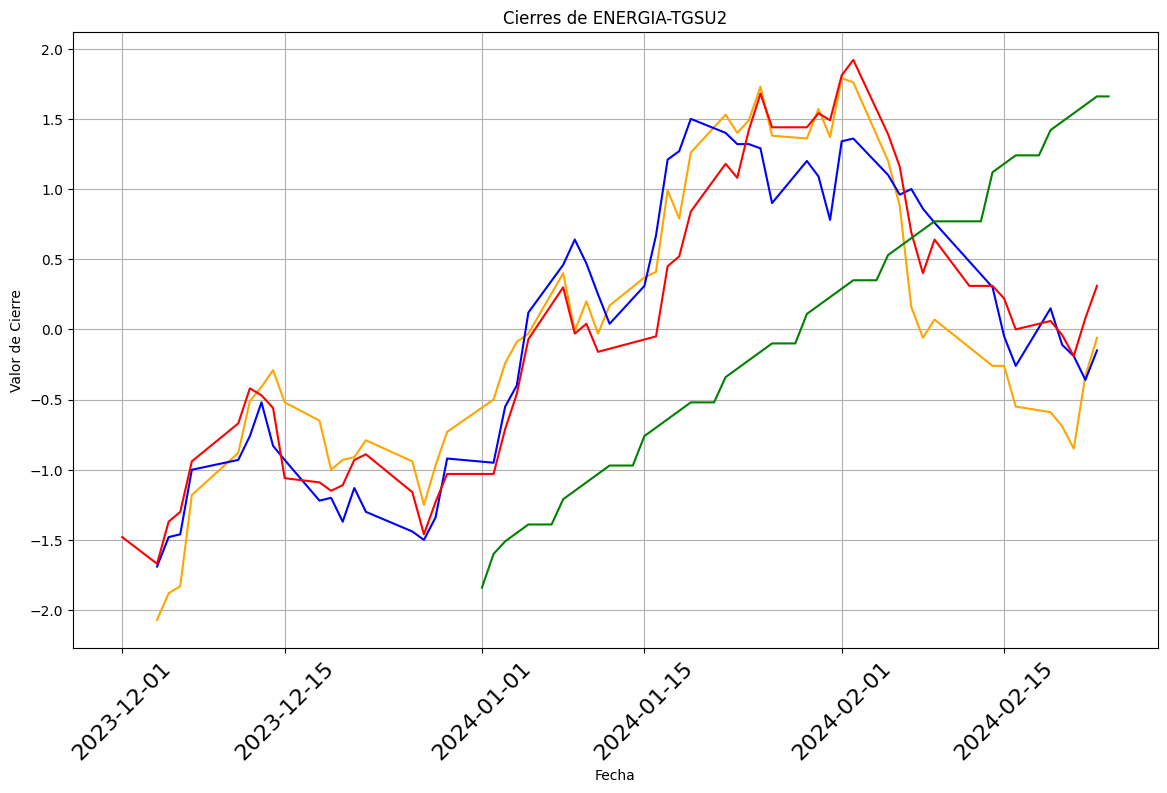

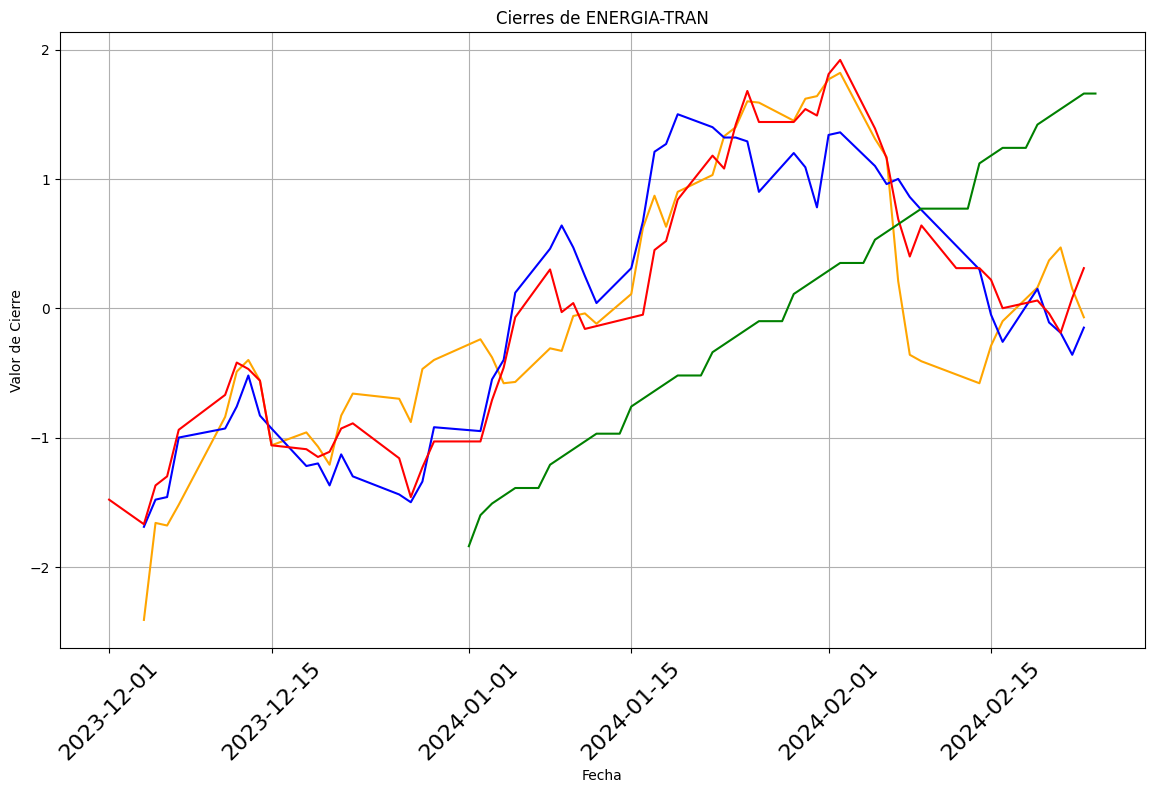

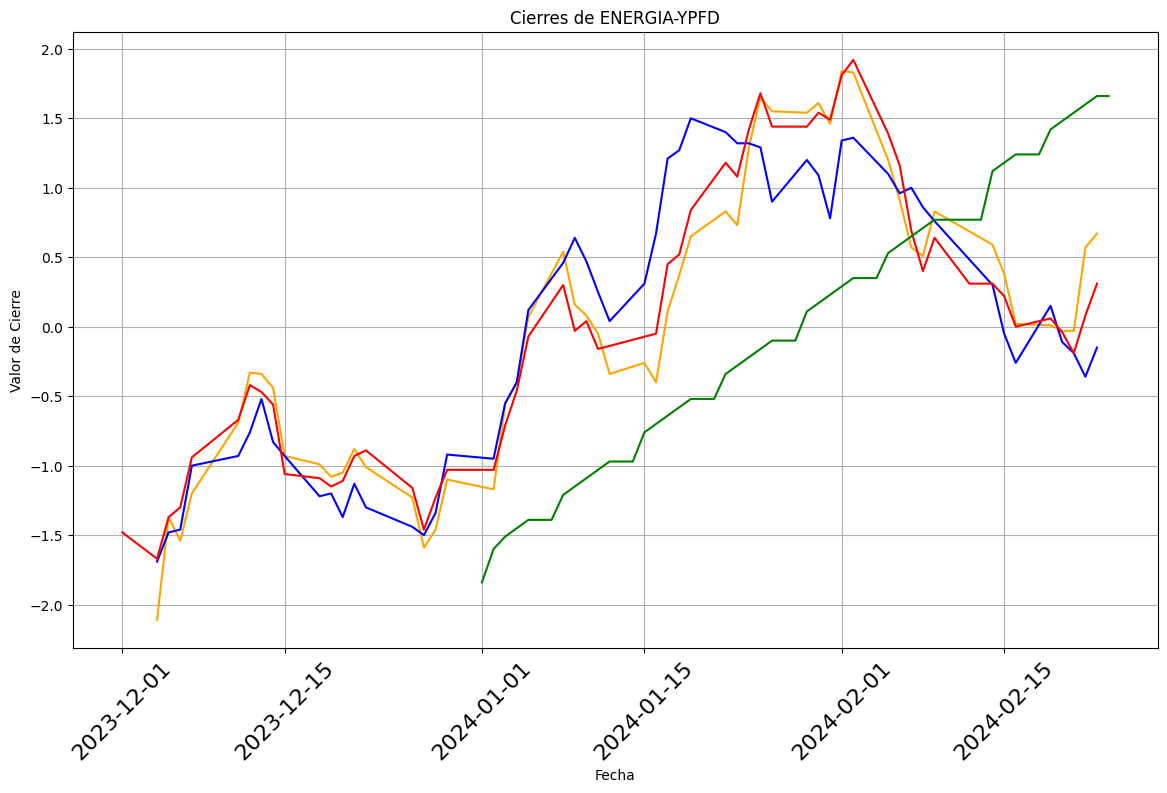

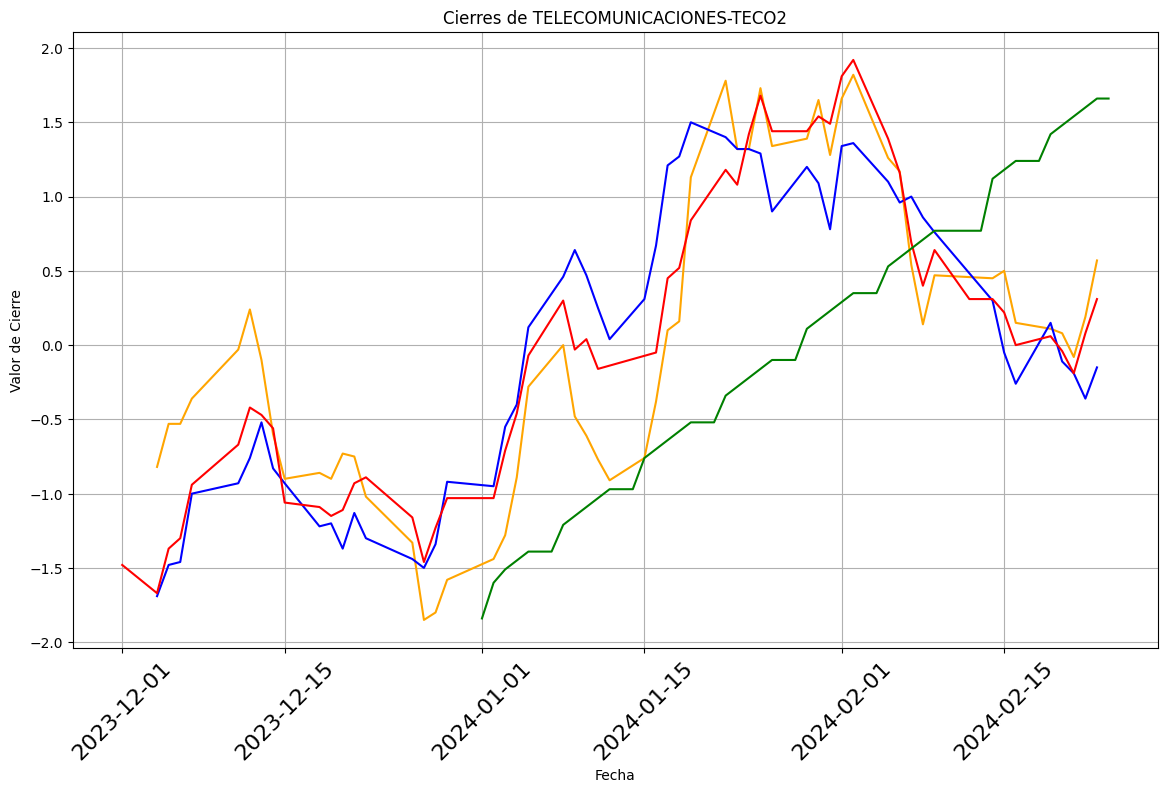

In [4]:
grupos_por_clase = df.groupby('CLASE')
for clave_clase, grupo_clase in grupos_por_clase:
    grupos_por_simbolo = grupo_clase.groupby('SIMBOLO')
    for clave_grupo, grupo in grupos_por_simbolo:
        df1 = grupos_por_simbolo.get_group(clave_grupo)
        df1 = df1.tail(dias)
        df1 = newBullishBearish(df1)
        df1 = normalizar(df1)
        plt.figure(figsize=(14, 8))
        plt.plot(df1['FECHA'], df1['CIERRE_N'], color='orange')
        plt.plot(df_dmep['FECHA'], df_dmep['CIERRE_N'], color='blue')
        plt.plot(df_merval['FECHA'], df_merval['CIERRE_N'], color='red')
        plt.plot(df_doficial['FECHA'], df_doficial['CIERRE_N'], color='green')
        #plt.plot(df_djones['FECHA'], df_djones['CIERRE_N'], color='yellow')
        plt.xticks(rotation=45, fontsize=16)
        plt.grid()
        plt.xlabel('Fecha')
        plt.ylabel('Valor de Cierre')
        plt.title('Cierres de'+ ' ' + clave_clase + '-' + clave_grupo)
        plt.show()

In [8]:
df_dmep.index = df_dmep['FECHA']
df_dmep.index

DatetimeIndex(['2023-12-04', '2023-12-05', '2023-12-06', '2023-12-07',
               '2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14',
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29', '2024-01-02', '2024-01-03',
               '2024-01-04', '2024-01-05', '2024-01-08', '2024-01-09',
               '2024-01-10', '2024-01-11', '2024-01-12', '2024-01-15',
               '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19',
               '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25',
               '2024-01-26', '2024-01-29', '2024-01-30', '2024-01-31',
               '2024-02-01', '2024-02-02', '2024-02-05', '2024-02-06',
               '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-14',
               '2024-02-15', '2024-02-16', '2024-02-19', '2024-02-20',
               '2024-02-21', '2024-02-22', '2024-02-23'],
              dtype

In [ ]:
grupos_por_simbolo = df.groupby('SIMBOLO')
df1 = pd.DataFrame()
for clave_grupo, grupo in grupos_por_simbolo:
    df1 = grupos_por_simbolo.get_group(clave_grupo)
    df1 = df1.tail(dias)
    df1 = newBullishBearish(df1)
    df1 = normalizar(df1)

    plt.figure(figsize=(14, 8))
    plt.plot(df1['FECHA'], df1['RESULTADO_N'], color='orange')
    plt.plot(df_dmep['FECHA'], df_dmep['RESULTADO_N'], color='blue')
    plt.plot(df_merval['FECHA'], df_merval['RESULTADO_N'], color='red')
    
    plt.xticks(rotation=45, fontsize=16)
    plt.grid()
    plt.xlabel('Fecha')
    plt.ylabel('Valor de Cierre')
    plt.title('Cierres de'+ ' ' + clave_grupo)
    plt.show()

In [5]:
panel_gral_file = 'data/panelgeneral.csv'
df_panel_gral = read_data(panel_gral_file)
df_panel_gral = df_panel_gral.sort_values(by=['FECHA'])
df_panel_gral = convertir(df_panel_gral)

grupos_por_simbolo = df_panel_gral.groupby('SIMBOLO')

for clave_grupo, grupo in grupos_por_simbolo:
    df1 = grupos_por_simbolo.get_group(clave_grupo)
    df1 = df1.tail(dias)
    df1 = newBullishBearish(df1)
    df1 = normalizar(df1)

    plt.figure(figsize=(14, 8))
    plt.plot(df1['FECHA'], df1['CIERRE_N'], color='orange')
    plt.plot(df_dmep['FECHA'], df_dmep['CIERRE_N'], color='blue')
    plt.plot(df_merval['FECHA'], df_merval['CIERRE_N'], color='red')

    plt.xticks(rotation=45, fontsize=16)
    plt.grid()
    plt.xlabel('Fecha')
    plt.ylabel('Valor de Cierre')
    plt.title('Cierres de' + ' ' + clave_grupo)
    plt.show()

ParserError: Error tokenizing data. C error: Expected 12 fields in line 1393, saw 23


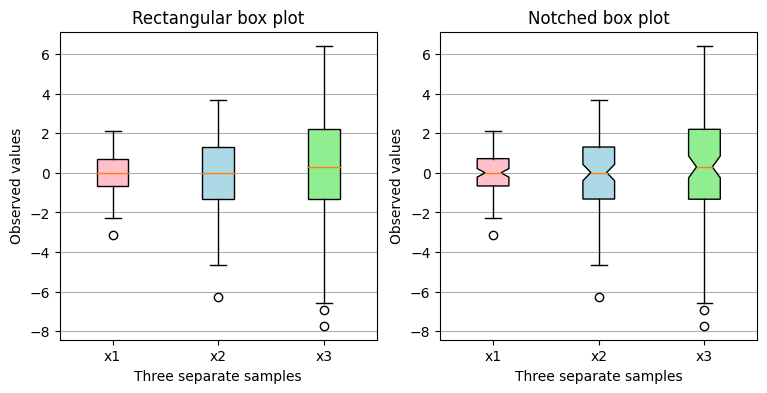

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(all_data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()


In [8]:
df1

,SIMBOLO,FECHA,VENCIMIENTO,TIPO DE SERIE,CIERRE,APERTURA,MAXIMO,MINIMO,PRECIO PROMEDIO,VOLUMEN NOMINAL,MONTO NEGOCIADO,CANTIDAD DE OPERACIONES,RESULTADO,PORCENTAJE,CLASE,CIERRE_N,APERTURA_N,MAXIMO_N,MINIMO_N
777,YPFD,2023-11-28,48 hs.,Homogenea,14407.80,15790.0,16249.00,14300.00,"14740,698",398127,"5868669759,75",8178,-1382.20,-0.087536,ENERGIA,-0.970254,-0.524209,-0.566538,-0.767103
750,YPFD,2023-11-29,48 hs.,Homogenea,14301.45,14316.0,15088.30,14208.80,"14457,52",369811,"5346550092,6",6393,-14.55,-0.001016,ENERGIA,-1.000000,-1.000000,-0.912087,-0.793654
723,YPFD,2023-11-30,48 hs.,Homogenea,14346.10,14350.0,14793.00,13500.00,"14028,83",352825,"4949721821,7",5529,-3.90,-0.000272,ENERGIA,-0.987511,-0.989025,-1.000000,-1.000000
701,YPFD,2023-12-01,48 hs.,Homogenea,15296.90,14500.0,15450.00,14216.00,"14695,544",339057,"4982627122,25",7486,796.90,0.054959,ENERGIA,-0.721572,-0.940607,-0.804406,-0.791557
680,YPFD,2023-12-04,48 hs.,Homogenea,14664.55,15350.0,15437.75,14500.00,"14910,96",254197,"3790432400,4",6926,-685.45,-0.044655,ENERGIA,-0.898441,-0.666236,-0.808053,-0.708879
661,YPFD,2023-12-05,48 hs.,Homogenea,16149.25,14800.0,16173.00,14650.50,"15641,47",347822,"5440631457,75",8355,1349.25,0.091166,ENERGIA,-0.483169,-0.843770,-0.589163,-0.665066
657,YPFD,2023-12-06,48 hs.,Homogenea,15800.30,16020.0,16800.00,15100.00,"15696,82",526635,"8266494550,8",11085,-219.70,-0.013714,ENERGIA,-0.580771,-0.449968,-0.402501,-0.534207
638,YPFD,2023-12-07,48 hs.,Homogenea,16489.10,16000.0,16801.00,15630.00,"16224,777",595505,"9661935548,15",13751,489.10,0.030569,ENERGIA,-0.388113,-0.456423,-0.402203,-0.379913
617,YPFD,2023-12-11,48 hs.,Homogenea,17495.35,17110.0,17650.00,16175.00,"17215,52",445213,"7685867678,25",10308,385.35,0.022522,ENERGIA,-0.106664,-0.098128,-0.149449,-0.221252
598,YPFD,2023-12-12,48 hs.,Homogenea,18217.15,17801.0,18380.00,17252.00,"17856,124",653701,11684361297,11729,416.15,0.023378,ENERGIA,0.095224,0.124919,0.067877,0.092285


In [9]:
#Cómo marcar alertas en un gráfico?
# definir que quiero hacer.... comprar o vender?: Esto se puede definir a partir de % que estoy dispuesto a perder o ganar
# Costo de la operación: comisiones, impuestos, etc
# Costo del mantenimiento mensual
# inflación acumulada
#Alerta de Venta por papel
#Entrenar un modelo para predecir el precio de cierre

comprar = 2
vender = 20
tamaño_lote = 4
grupos_por_simbolo = df.groupby('SIMBOLO')
df1 = pd.DataFrame()
for clave_grupo, grupo in grupos_por_simbolo:
    lotes = [grupo.iloc[i:i+tamaño_lote] for i in range(0, len(grupo), tamaño_lote)]
    
    for i, lote_actual in enumerate(lotes):
        lote_procesado = procesar_lote(lote_actual, comprar, vender)
        resultado_medio = lote_procesado['RESULTADO_N'].mean()
        resultado_avg = lote_procesado['RES_PESADO_N'].mean()
        print('Clave:' + clave_grupo+ ' Indice:', i, ' Resultado pesado:', resultado_medio)
    

KeyError: 'RES_PESADO_N'

In [ ]:
lote_procesado